In [3]:
from sklearn.cluster import DBSCAN
from ast import literal_eval
import numpy as np
import pandas as pd

In [128]:
# Generate sample data
# data = np.random.rand(100, 2)
# data = pd.read_csv("./Dataset/transaction_0.01_freq_vector.csv", index_col=[0], converters={"Transaction": literal_eval, "Vector":literal_eval})
# data = pd.read_csv("./Dataset/basket_freq_vector.csv", index_col=[0], converters={"Transaction": literal_eval, "Vector":literal_eval})
# data = pd.read_csv("./Dataset/basket_infreq_vector.csv", index_col=[0], converters={"Transaction": literal_eval, "Vector":literal_eval})
# data = pd.read_csv("./Dataset/job_freq_vector.csv", index_col=[0], converters={"Title": literal_eval, "Vector":literal_eval})
# data = pd.read_csv("./Dataset/job_infreq_vector.csv", index_col=[0], converters={"Transaction": literal_eval, "Vector":literal_eval})
data = pd.read_csv("./Dataset/book/book_0.09_freq_vector.csv", index_col=[0], converters={"Description": literal_eval, "Vector":literal_eval})
print(data.shape)
data.head() 

(5000, 2)


,Description,Vector
0,"[rug, sackett, famili, stood, breed, apart, fe...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[allinclus, guid, design, vacat, retreat, hosp...","[0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[world, war, two, luftwaff, aircraft, pilot, s...","[0, 0, 0, 2, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, ..."
3,"[fiction, histori, fourthcenturi, irish, monk,...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,"[1941, killakeet, island, windswept, outer, ba...","[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, ..."


In [143]:
clusters = {}

for i in range(5,10,1):
    data = pd.read_csv("./Dataset/Book/book_0.0{}_freq_vector.csv".format(i), index_col=[0], converters={"Description": literal_eval, "Vector":literal_eval})

    for j in range(10,51,5):
        j = j/100
        # Create DBSCAN instance
        dbscan = DBSCAN(eps=j, min_samples=5, metric='cosine')

        # Fit model to data and get labels
        vectors = list(data['Vector'])
        # Fit and predict clusters
        labels = dbscan.fit_predict(vectors)

        data["Cluster"] = labels

        # Export
        data.to_csv("./Output Clusters/Book/dbscan_0.0{}_{}_output.csv".format(i, j), header=False)


In [129]:
best_eps_unclustered = 0.1
lowest_no_unclustered_pts = 9999
best_eps_no_of_clusters = 0.1
highest_no_of_clusters = 0
results = {}
for i in range(10,50,1):
    i = i/100
    for j in range(5,101,5):
        # Create DBSCAN instance
        dbscan = DBSCAN(eps=i, min_samples=j)#, metric='cosine')

        # Fit model to data and get labels
        vectors = list(data['Vector'])
        dbscan.fit(vectors)
        labels = dbscan.labels_

        # Fit and predict clusters
        y_pred = dbscan.fit_predict(vectors)

        # Get number of clusters
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Print clusters
        # print('Number of clusters: ', n_clusters)
        # print('Cluster labels: ', labels)
        data["Cluster"] = labels
        if data[data["Cluster"]==-1].shape[0] < lowest_no_unclustered_pts:
            best_eps_unclustered = i
            lowest_no_unclustered_pts = data[data["Cluster"]==-1].shape[0]
        if n_clusters > highest_no_of_clusters:
            best_eps_no_of_clusters = i
            highest_no_of_clusters = n_clusters
        results[str(i)+"-"+str(j)] = [data[data["Cluster"]==-1].shape[0], n_clusters]
print("Lowest Number of unclustered data points:", lowest_no_unclustered_pts, "| eps:", best_eps_unclustered)
print("Highest Number of clusters:", highest_no_of_clusters, "| eps:", best_eps_no_of_clusters)

Lowest Number of unclustered data points: 3879 | eps: 0.1
Highest Number of clusters: 50 | eps: 0.1


In [126]:
# creating list of eps
eps_list = [i/100 for i in range(10,50,1)]

# getting list min_sample
min_samp_list = [i for i in range(5,101,5)]

eps_lowest_unclustered = []
eps_highest_clusters = []

for eps in eps_list:
    lowest_unclustered = 9999
    highest_clusters = 0
    for min_samp in min_samp_list:
        # getting y of eps (lowest number of unclustered point)  [0]
        if results[str(eps)+"-"+str(min_samp)][0] < lowest_unclustered:
            lowest_unclustered = results[str(eps)+"-"+str(min_samp)][0]
        # getting y of eps (highest number of clusters) [1]
        if results[str(eps)+"-"+str(min_samp)][1] > highest_clusters:
            highest_clusters = results[str(eps)+"-"+str(min_samp)][1]
    eps_lowest_unclustered.append(lowest_unclustered)
    eps_highest_clusters.append(highest_clusters)
    
ms_lowest_unclustered = []
ms_highest_clusters = []
for min_samp in min_samp_list:
    lowest_unclustered = 9999
    highest_clusters = 0
    for eps in eps_list:
        # getting y of min_samp (lowest number of unclustered point) [0]
        if results[str(eps)+"-"+str(min_samp)][0] < lowest_unclustered:
            lowest_unclustered = results[str(eps)+"-"+str(min_samp)][0]    
        # getting y of min_samp (highest number of clusters) [1]
        if results[str(eps)+"-"+str(min_samp)][1] > highest_clusters:
            highest_clusters = results[str(eps)+"-"+str(min_samp)][1]
    ms_lowest_unclustered.append(lowest_unclustered)
    ms_highest_clusters.append(highest_clusters)

print(eps_lowest_unclustered)
print(eps_highest_clusters)
print(ms_lowest_unclustered)
print(ms_highest_clusters)

[4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206, 4206]
[54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54]
[4206, 4419, 4527, 4595, 4680, 4680, 4680, 4680, 4680, 4680, 4680, 4680, 4680, 4680, 4680, 4680, 4680, 4680, 4680, 4680]
[54, 19, 9, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


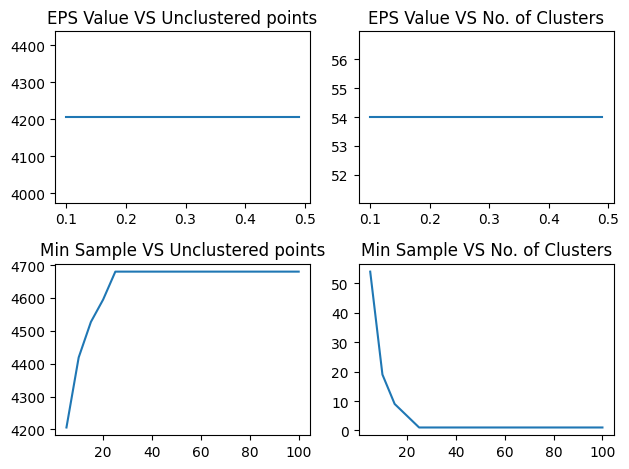

In [127]:
import matplotlib.pyplot as plt


# Create plots 
fig, axes = plt.subplots(2, 2)

axes[0, 0].plot(eps_list, eps_lowest_unclustered)
axes[0, 0].set_title('EPS Value VS Unclustered points')

axes[0, 1].plot(eps_list, eps_highest_clusters)
axes[0, 1].set_title('EPS Value VS No. of Clusters') 

axes[1, 0].plot(min_samp_list, ms_lowest_unclustered)
axes[1, 0].set_title('Min Sample VS Unclustered points')

axes[1, 1].plot(min_samp_list, ms_highest_clusters) 
axes[1, 1].set_title('Min Sample VS No. of Clusters')

fig.tight_layout()
plt.show()

In [94]:
# Create DBSCAN instance
dbscan = DBSCAN(eps=0.49, min_samples=10, metric='cosine')

# Fit model to data and get labels
vectors = list(data['Vector'])
dbscan.fit(vectors)
labels = dbscan.labels_

# Fit and predict clusters
y_pred = dbscan.fit_predict(vectors)

# Get number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Print clusters
print('Number of clusters: ', n_clusters)
print('Cluster labels: ', labels)
data["Cluster"] = labels

Number of clusters:  2
Cluster labels:  [0 0 0 ... 0 0 0]


In [88]:
data[data["Cluster"]==-1].shape[0]

3533

In [51]:
# Generate sample data
# data = np.random.rand(100, 2)
data = pd.read_csv("./Dataset/basket_infreq_vector.csv", index_col=[0], converters={"Transaction": literal_eval, "Vector":literal_eval})
data.head()

dim = len(data["Vector"][0])
n = data.shape[0]

print("Dimension:", dim)
print("Number of Rows:", n)

# Create DBSCAN instance
dbscan = DBSCAN(eps=0.01, min_samples=50)

# Fit model to data and get labels
vectors = list(data['Vector'])
labels = dbscan.fit_predict(vectors)

# Get number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Print clusters
print('Number of clusters: ', n_clusters)
print('Cluster labels: ', labels)

data["Cluster"] = labels

Dimension: 167
Number of Rows: 14963
Number of clusters:  4
Cluster labels:  [-1 -1 -1 ... -1 -1 -1]


In [47]:
data[data["Cluster"] == -1]

,Transaction,Vector,Cluster
0,"[salty snack, pastry, whole milk]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1
1,"[yogurt, semi-finished bread, whole milk, saus...","[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1
3,"[misc. beverages, canned beer]","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",-1
4,"[hygiene articles, sausage]","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",-1
5,"[rolls/buns, whole milk, sausage]","[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",-1
...,...,...,...
14958,"[butter milk, whipped/sour cream]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",-1
14959,"[herbs, bottled water]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1
14960,"[onions, fruit/vegetable juice]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1
14961,"[bottled beer, other vegetables]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1


In [118]:
data.to_csv("./Output Clusters/dbscan-0.01-1-cluster-output.csv")